In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [18]:
df = pd.read_csv('/Users/kaciechong/Desktop/First Gen.csv')
df

,Unnamed: 0,Unnamed: 1,Academic Year of Participation,Academic Year of Participation.1,Academic Year of Participation.2,Academic Year of Participation.3,Academic Year of Participation.4
0,NaN,NaN,2020-21,2021-22,2022-23,2023-24,Grand Total
1,Continuing-generation,Headcount,42,"1,103","2,781","3,832","7,758"
2,Continuing-generation,FTE sum,22,577,"1,232","1,720","3,551"
3,First-generation,Headcount,21,550,"1,071","1,162","2,804"
4,First-generation,FTE sum,11,286,480,491,"1,267"
5,Don't know,Headcount,NaN,20,40,45,105
6,Don't know,FTE sum,NaN,12,17,20,49
7,Decline to state/ not reported,Headcount,9,90,253,293,645
8,Decline to state/ not reported,FTE sum,5,48,110,126,288
9,Grand Total,Headcount,72,"1,763","4,145","5,332","11,312"


In [19]:
df = df[df.index % 2 != 0]
df

,Unnamed: 0,Unnamed: 1,Academic Year of Participation,Academic Year of Participation.1,Academic Year of Participation.2,Academic Year of Participation.3,Academic Year of Participation.4
1,Continuing-generation,Headcount,42,"1,103","2,781","3,832","7,758"
3,First-generation,Headcount,21,550,"1,071","1,162","2,804"
5,Don't know,Headcount,NaN,20,40,45,105
7,Decline to state/ not reported,Headcount,9,90,253,293,645
9,Grand Total,Headcount,72,"1,763","4,145","5,332","11,312"


In [20]:
df = df.drop('Unnamed: 1', axis=1)
df = df.drop('Academic Year of Participation.4', axis=1)

df = df.rename(columns={'Unnamed: 0': 'Generation'})
df = df.rename(columns={'Academic Year of Participation': '2020-21'})
df = df.rename(columns={'Academic Year of Participation.1': '2021-22'})
df = df.rename(columns={'Academic Year of Participation.2': '2022-23'})
df = df.rename(columns={'Academic Year of Participation.3': '2023-24'})
df = df.drop(9)
df

,Generation,2020-21,2021-22,2022-23,2023-24
1,Continuing-generation,42,"1,103","2,781","3,832"
3,First-generation,21,550,"1,071","1,162"
5,Don't know,NaN,20,40,45
7,Decline to state/ not reported,9,90,253,293


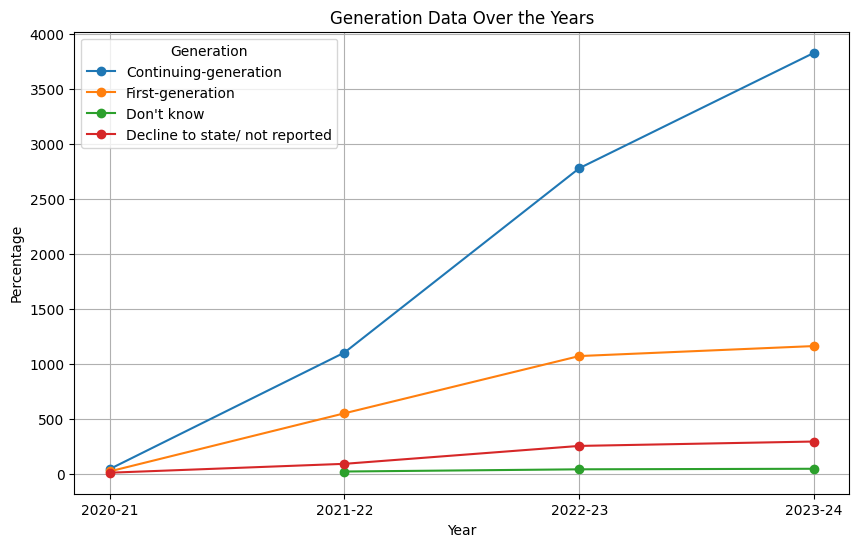

In [21]:
df['2020-21'] = df['2020-21'].replace({'%': '', ',': ''}, regex=True).astype(float)
df['2021-22'] = df['2021-22'].replace({'%': '', ',': ''}, regex=True).astype(float)
df['2022-23'] = df['2022-23'].replace({'%': '', ',': ''}, regex=True).astype(float)
df['2023-24'] = df['2023-24'].replace({'%': '', ',': ''}, regex=True).astype(float)


df.set_index('Generation', inplace=True)


# Plot the line chart
plt.figure(figsize=(10,6))
for generation in df.index:
    plt.plot(df.columns, df.loc[generation], label=generation, marker='o')

# Adding labels and title
plt.title('Generation Data Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Generation')
plt.grid(True)

desktop = os.path.join(os.path.expanduser('~'), 'Desktop')

save_path = os.path.join(desktop, 'Generation.png')

# Save the figure
plt.savefig(save_path, dpi=300)